In [1]:
import numpy as np
from scipy.optimize import fsolve,root
import matplotlib.pyplot as plt
import serial, string, time
import re

In [2]:
def parse_line(line_str):
    m = re.match("Pkt (\d+) - ToA (\d+) to [\d]: (-\S+|\S+) mm",line_str)
    if(m):
        return [m.group(1),m.group(2),m.group(3)]
    else:
        return None

In [3]:
def toa_solver(x,*args):
    anchor_loc = args[0]
    toa_vec = args[1]
    
    a = []
    for i in np.arange(toa_vec.shape[0]):
        if(toa_vec[i]!=0):
            a.append(  np.sqrt((x[0]-anchor_loc[i,0])**2+(x[1]-anchor_loc[i,1])**2)-toa_vec[i]  )
    return a

In [33]:
output = ""
ser = serial.Serial('/dev/ttyACM0', 115200,timeout=5)
anchor_loc = np.array([[0,0],[10000,0],[0,10000],[10000,10000]])
tag_loc_true = np.array([4,6])
num_anchors = anchor_loc.shape[0]

toa_vec = np.zeros(num_anchors)

current_id = 0
current_ranging_id = 0
solution_count = 0
all_tag_loc = np.array([[0,0]])
for i in range(100):
    output = ser.readline()
#     print(str(output,'UTF-8'))
    if(len(output)>5):
        ans = parse_line(str(output,'UTF-8'))
        if(ans):
            current_id,device_id,toa = ans[0],ans[1],ans[2]
            print("pkt ",current_id," device ",device_id," toa ",toa)
            if(current_id==current_ranging_id):
                toa_vec[int(device_id)-1] = float(toa)
            else:
                print(toa_vec)
                if(sum(toa_vec!=0)>=3):
                    print('solving')
                    tag_loc = root(toa_solver, [1, 1],args=(anchor_loc,toa_vec),method='lm')
                    
                    print(tag_loc.x)
                    all_tag_loc = np.append(all_tag_loc,[tag_loc.x], axis=0)
                toa_vec = np.zeros(num_anchors)
                toa_vec[int(device_id)-1] = float(toa)
                current_ranging_id = current_id
                                
            

pkt  16701  device  2  toa  8634
[0. 0. 0. 0.]
pkt  16701  device  3  toa  5488
pkt  16701  device  4  toa  7156
pkt  16702  device  1  toa  7324
[   0. 8634. 5488. 7156.]
solving
[3951.15927269 6175.85993219]
pkt  16702  device  2  toa  8645
pkt  16702  device  3  toa  5475
pkt  16702  device  4  toa  7149
pkt  16703  device  1  toa  7351
[7324. 8645. 5475. 7149.]
solving
[3943.90897039 6182.6497354 ]
pkt  16703  device  2  toa  8625
pkt  16703  device  3  toa  5493
pkt  16703  device  4  toa  7180
pkt  16704  device  1  toa  7342
[7351. 8625. 5493. 7180.]
solving
[3951.03476766 6172.62395426]
pkt  16704  device  2  toa  8646
pkt  16704  device  3  toa  5488
pkt  16704  device  4  toa  7159
pkt  16705  device  1  toa  7337
[7342. 8646. 5488. 7159.]
solving
[3948.85952948 6183.64528959]
pkt  16705  device  2  toa  8610
pkt  16705  device  3  toa  5480
pkt  16705  device  4  toa  7148
pkt  16706  device  1  toa  7350
[7337. 8610. 5480. 7148.]
solving
[3961.38946435 6174.92073787]
pkt  1

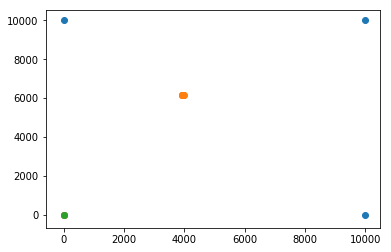

In [34]:
plt.scatter(anchor_loc[:,0],anchor_loc[:,1])
plt.scatter(all_tag_loc[:,0],all_tag_loc[:,1])
plt.scatter(tag_loc_true[0],tag_loc_true[1])

In [35]:
print(all_tag_loc)

[[   0.            0.        ]
 [3951.15927269 6175.85993219]
 [3943.90897039 6182.6497354 ]
 [3951.03476766 6172.62395426]
 [3948.85952948 6183.64528959]
 [3961.38946435 6174.92073787]
 [3952.86366272 6167.96497161]
 [3942.29473182 6166.14899076]
 [3958.59768219 6169.60642303]
 [3943.0378688  6175.80411563]
 [3955.23467504 6153.83146873]
 [3959.38443352 6170.10394429]
 [3935.7061033  6165.65718253]
 [3943.01971332 6169.20328155]
 [3973.96011783 6172.02969974]
 [3939.52201475 6181.28237316]
 [3950.62268382 6169.92158394]
 [3948.34877399 6169.21919312]
 [3953.39732609 6166.49950481]
 [3947.98494234 6166.19730503]
 [3955.21517927 6185.79737842]
 [3953.84099869 6153.16570561]
 [3948.5818351  6161.42567848]
 [3962.1366081  6174.55389713]
 [3938.95320966 6179.67298058]
 [3945.76710607 6179.37364084]]
